# Credit Card Approval Dataset

# Attributes :-
(A) Application record - 
    1. ID - Customer Id
    2. CODE_GENDER - Gender of Customers
    3. FLAG_OWN_CAR - Does the customer own car
    4. FLAG_OWN_REALITY - Does the customer own reality
    5. CNT_CHILDREN - How many children does the customer
    6. AMT_INCOME_TOTAL - Total income
    6. NAME_INCOME_TYPE - Income Type
    7. NAME_EDUCATION_TYPE - Highest Education
    8. NAME_FAMILY_STATUS - Family Status
    9. NAME_HOUSING_TYPE - House Status
    10.DAYS_BIRTH - Number of Days of Birth when Loan was Sanctioned
    11.DAYS_EMPLOYED - No of Days person is employed since birth when loan was sanctioned
    12.FLAG_MOBIL - Does the customer own mobile 
    13.FLAG_WORK_PHONE - Does the customer own Work phone
    14.FLAG_PHONE - Does the customer own personal phone
    15.FLAG_EMAIL - Does the customer have mail
    16.OCCUPATION_TYPE - What occupation does customer have
    17.CNT_FAM_MEMBERS - Number of Family memebers

(B) Credit Record - 
    1. ID - Customer ID
    2. MONTHS_BALANCE - The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on
    3. STATUS - Status of loan payment for every month for every customer. 0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days C: paid off that month X: No loan for the month

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
application=pd.read_csv("application_record.csv")
credit=pd.read_csv("credit_record.csv")

In [3]:
application.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [4]:
credit.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [5]:
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [6]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


This shows that number of rows in credit dataset is a lot more than in application dataset and this is because in credit record it contains information on every month since loan taken(not always). So we take the max value(in this case min because data is in negative) to get table with unique ID's.

Plus on going through dataset we saw that some records are repeated for different ID's in application dataset
and also all the unique ID's of application and credit datasets are not same.

In [7]:
application.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


# Preprocessing

In [8]:
month=pd.DataFrame(credit.groupby(["ID"])["MONTHS_BALANCE"].agg(min))

In [9]:
month

,MONTHS_BALANCE
ID,
5001711,-3
5001712,-18
5001713,-21
5001714,-14
5001715,-59
...,...
5150482,-28
5150483,-17
5150484,-12


This shows for how many months the customer have been giving payments

In [10]:
modified_application=pd.merge(application,month,on="ID",how="left")

In [11]:
modified_application=modified_application.rename(columns={'MONTHS_BALANCE':'MONTHS'})

In [12]:
modified_application

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-15.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-14.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-29.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-4.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0,NaN
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0,NaN
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0,NaN
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0,NaN


We merged the datasets so that we can get info about months in application record

In [13]:
credit['IS_RISKY'] = None
credit['IS_RISKY'][credit['STATUS'] =='2']='Yes' 
credit['IS_RISKY'][credit['STATUS'] =='3']='Yes' 
credit['IS_RISKY'][credit['STATUS'] =='4']='Yes' 
credit['IS_RISKY'][credit['STATUS'] =='5']='Yes' 

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing t

We take loans as risky which are pended for more than 2 months i.e status >=2

In [14]:
credit

,ID,MONTHS_BALANCE,STATUS,IS_RISKY
0,5001711,0,X,None
1,5001711,-1,0,None
2,5001711,-2,0,None
3,5001711,-3,0,None
4,5001712,0,C,None
...,...,...,...,...
1048570,5150487,-25,C,None
1048571,5150487,-26,C,None
1048572,5150487,-27,C,None
1048573,5150487,-28,C,None


In [15]:
df=credit.groupby('ID').count()

In [16]:
df

,MONTHS_BALANCE,STATUS,IS_RISKY
ID,,,
5001711,4,4,0
5001712,19,19,0
5001713,22,22,0
5001714,15,15,0
5001715,60,60,0
...,...,...,...
5150482,18,18,0
5150483,18,18,0
5150484,13,13,0


In [17]:
df['IS_RISKY'][df['IS_RISKY'] > 0]='Yes' 
df['IS_RISKY'][df['IS_RISKY'] == 0]='No' 
df = df[['IS_RISKY']]

In [18]:
df

,IS_RISKY
ID,
5001711,No
5001712,No
5001713,No
5001714,No
5001715,No
...,...
5150482,No
5150483,No
5150484,No


In [19]:
modified_application=pd.merge(modified_application,df,on='ID',how='inner')

In [20]:
modified_application['DAYS_EMPLOYED']=modified_application['DAYS_EMPLOYED']*-1
modified_application['DAYS_BIRTH']=modified_application['DAYS_BIRTH']*-1
modified_application['MONTHS']=modified_application['MONTHS']*-1

In [21]:
modified_application

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS,IS_RISKY
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,12005,4542,1,1,0,0,NaN,2.0,15.0,No
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,12005,4542,1,1,0,0,NaN,2.0,14.0,No
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,21474,1134,1,0,0,0,Security staff,2.0,29.0,No
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,1,0,1,1,Sales staff,1.0,4.0,No
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,1,0,1,1,Sales staff,1.0,26.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,17348,2420,1,0,0,0,Managers,2.0,11.0,Yes
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,12387,1325,1,0,1,1,Medicine staff,2.0,23.0,Yes
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,12387,1325,1,0,1,1,Medicine staff,2.0,32.0,Yes
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,17958,655,1,0,0,0,Sales staff,2.0,9.0,Yes


We can see that when we apllied inner join between datatsets there were only 36457 rows which were unique in both tables.

In [22]:
gender_owner = modified_application.groupby(['CODE_GENDER','NAME_HOUSING_TYPE']).agg({'ID': 'count'})

gender_owner_percent = gender_owner.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
gender_owner_percent

ID
CODE_GENDER NAME_HOUSING_TYPE             
F           Co-op apartment       0.360213
            House / apartment    90.654932
            Municipal apartment   3.286942
            Office apartment      0.478919
            Rented apartment      1.166598
            With parents          4.052395
M           Co-op apartment       0.665170
            House / apartment    86.480419
            Municipal apartment   2.702253
            Office apartment      1.205621
            Rented apartment      2.411241
            With parents          6.535296

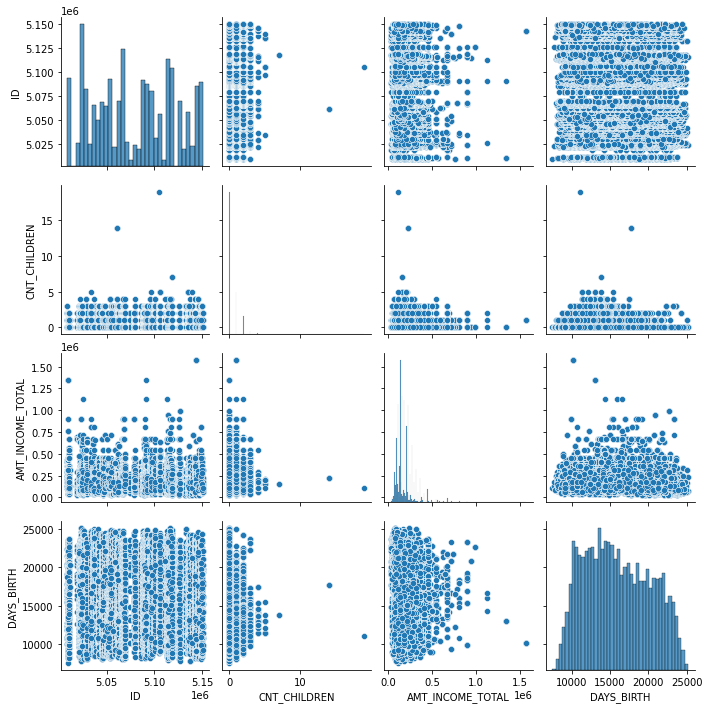

In [23]:
modified_application1=pd.DataFrame(modified_application.iloc[:,[0,4,5,10]])
sns.pairplot(modified_application1)

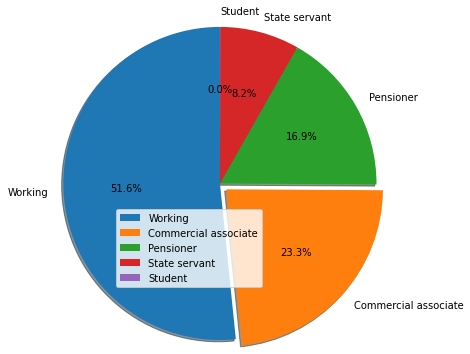

In [24]:
income_type=modified_application['NAME_INCOME_TYPE'].value_counts()
plt.pie(income_type,labels=modified_application['NAME_INCOME_TYPE'].unique(),startangle=90, shadow = True,radius = 1.8,autopct='%1.1f%%',explode=(0,0.1,0,0,0))
plt.legend() 
plt.show()

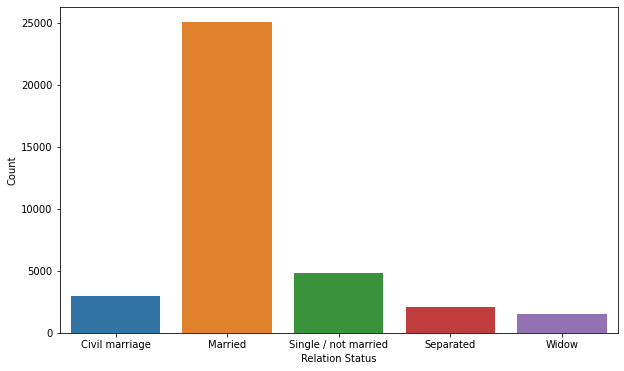

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(x="NAME_FAMILY_STATUS", data=modified_application)

plt.xlabel("Relation Status")
plt.ylabel("Count")
plt.show()

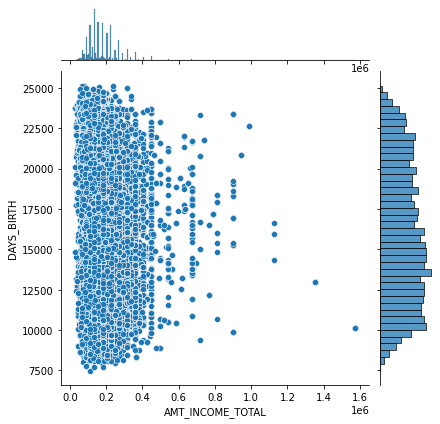

In [26]:
sns.jointplot(x='AMT_INCOME_TOTAL',y='DAYS_BIRTH',data=modified_application)

<AxesSubplot:>

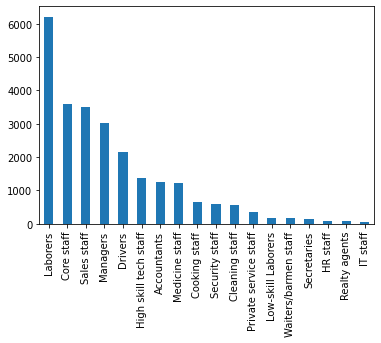

In [27]:
occupation=modified_application['OCCUPATION_TYPE'].value_counts()
occupation.plot.bar()

<AxesSubplot:xlabel='CNT_FAM_MEMBERS', ylabel='AMT_INCOME_TOTAL'>

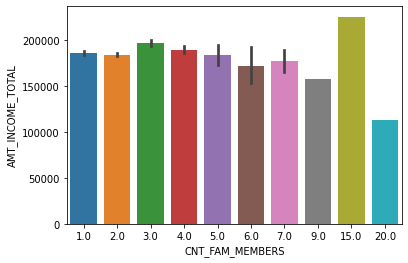

In [28]:
sns.barplot(x=modified_application['CNT_FAM_MEMBERS'],y=modified_application['AMT_INCOME_TOTAL'])

<AxesSubplot:xlabel='OCCUPATION_TYPE', ylabel='DAYS_EMPLOYED'>

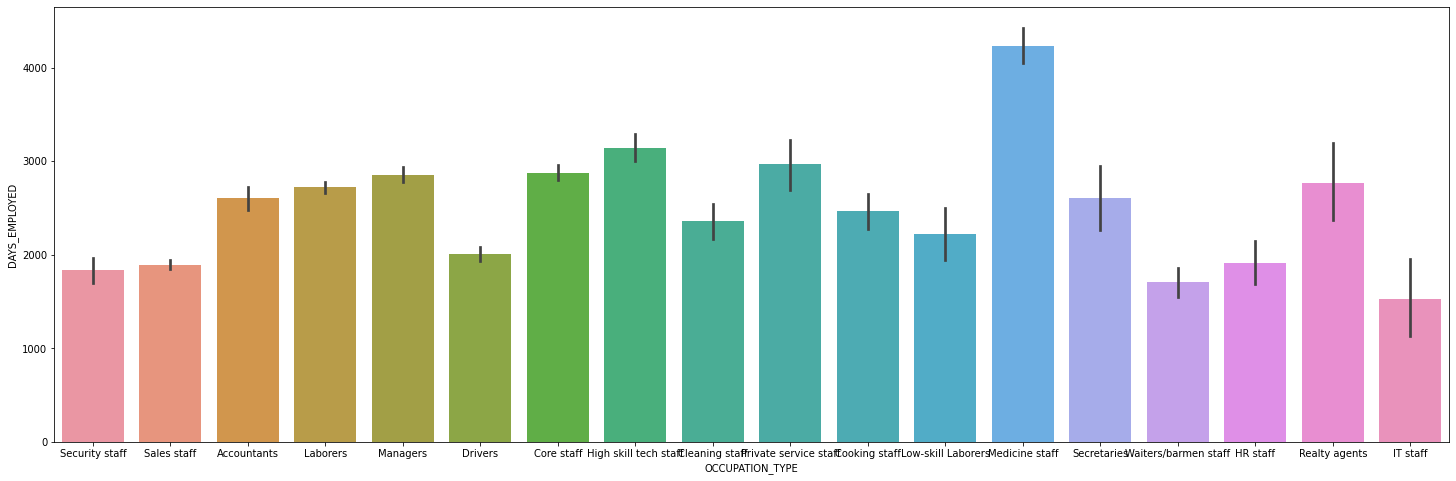

In [29]:
plt.figure(figsize=(25,8))
sns.barplot(x=modified_application['OCCUPATION_TYPE'],y=modified_application['DAYS_EMPLOYED'])


In [30]:
corr1=modified_application.corr()

<AxesSubplot:>

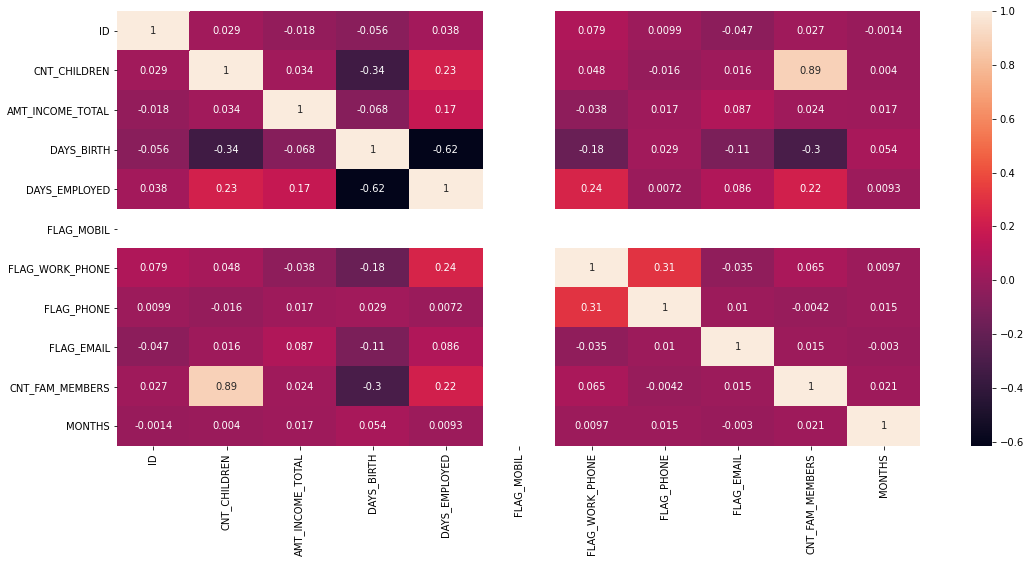

In [31]:
plt.figure(figsize=(18,8))
sns.heatmap(corr1,annot=True)

# Normalization

In [32]:
modified_application

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS,IS_RISKY
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,12005,4542,1,1,0,0,NaN,2.0,15.0,No
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,12005,4542,1,1,0,0,NaN,2.0,14.0,No
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,21474,1134,1,0,0,0,Security staff,2.0,29.0,No
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,1,0,1,1,Sales staff,1.0,4.0,No
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,1,0,1,1,Sales staff,1.0,26.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,17348,2420,1,0,0,0,Managers,2.0,11.0,Yes
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,12387,1325,1,0,1,1,Medicine staff,2.0,23.0,Yes
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,12387,1325,1,0,1,1,Medicine staff,2.0,32.0,Yes
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,17958,655,1,0,0,0,Sales staff,2.0,9.0,Yes


In [33]:
from sklearn.preprocessing import normalize

df=pd.DataFrame(modified_application.iloc[:,[5,10,11]])

x = normalize(df)
x = pd.DataFrame(x, columns= df.columns)
x.head()


,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED
0,0.999550,0.028069,0.010620
1,0.999550,0.028069,0.010620
2,0.982217,0.187486,0.009901
3,0.997441,0.070597,0.011271
4,0.997441,0.070597,0.011271


In [34]:
x1=df.iloc[:,[0,1]]

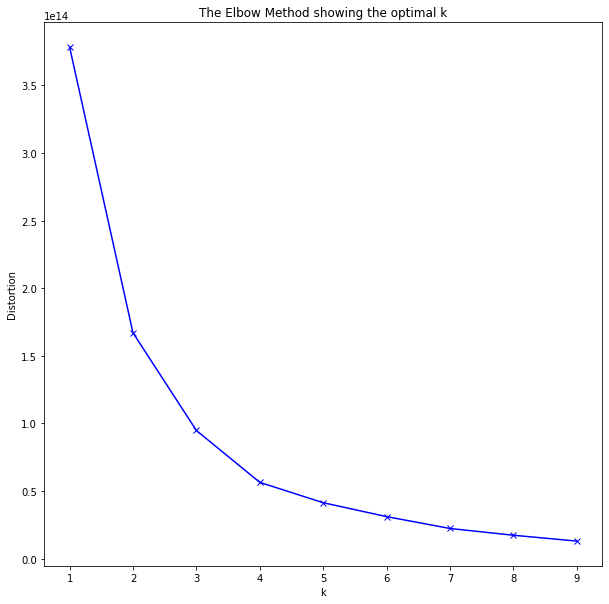

In [35]:
from sklearn.cluster import KMeans
distortions = []
K = range(1,10)
for i in K:
    kmeanModel = KMeans(n_clusters=i)
    kmeanModel.fit(x1)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(10,10))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()    

Best cluster 4

In [36]:
kmeans=KMeans(n_clusters=4,init='k-means++', n_init=10,  max_iter=300)

In [37]:
kmeans.fit(x1)

KMeans(n_clusters=4)

In [38]:
kmeans.cluster_centers_

array([[219258.24768212,  15670.85798381],
       [119584.02531346,  16264.59345696],
       [722272.392     ,  16332.70133333],
       [366235.38461538,  15550.04558405]])

In [39]:
x1=x1.values

In [40]:
y_kmeans=kmeans.fit_predict(x1)

In [41]:
kmeans.labels_

array([3, 3, 1, ..., 1, 0, 1])

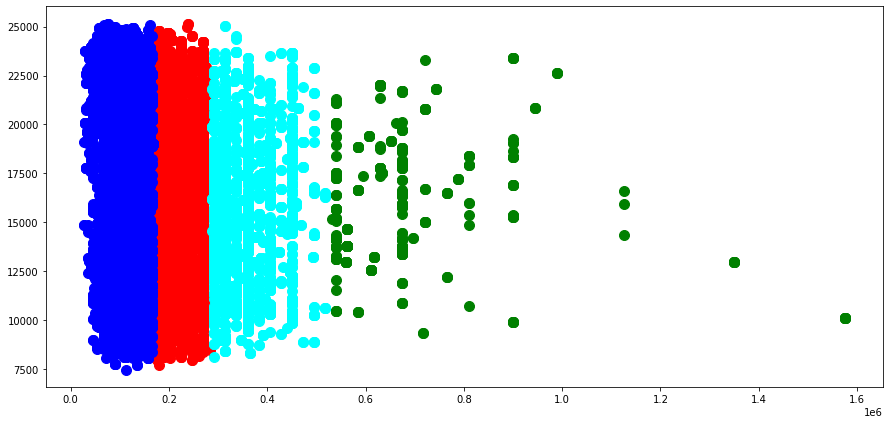

In [42]:
plt.figure(figsize=(15,7))
plt.scatter(x1[y_kmeans == 0, 0], x1[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x1[y_kmeans == 1, 0], x1[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x1[y_kmeans == 2, 0], x1[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x1[y_kmeans == 3, 0], x1[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')

# Assessment 

### Davies Bouldin Index

In [43]:
from sklearn.metrics import davies_bouldin_score as db 
db(x1,y_kmeans)

0.5202242530418896

 Davies-Bouldin Index evaluates intra-cluster similarity and inter-cluster differences. Db index should be as low as possible.

### Silhouette Coefficient

In [ ]:
from sklearn.metrics import silhouette_score as ss 
ss(x1,y_kmeans)

The Silhouette Coefficient tells us how well-assigned each individual point is. SC should be as high as possible

# Heirarchiacal Clustering

# Randomly Selecting 10000 rows for dendograms and Agglomerative clustring

In [53]:
x2=x.sample(n=10000)

In [54]:
x3=x2.iloc[:,[0,1]]

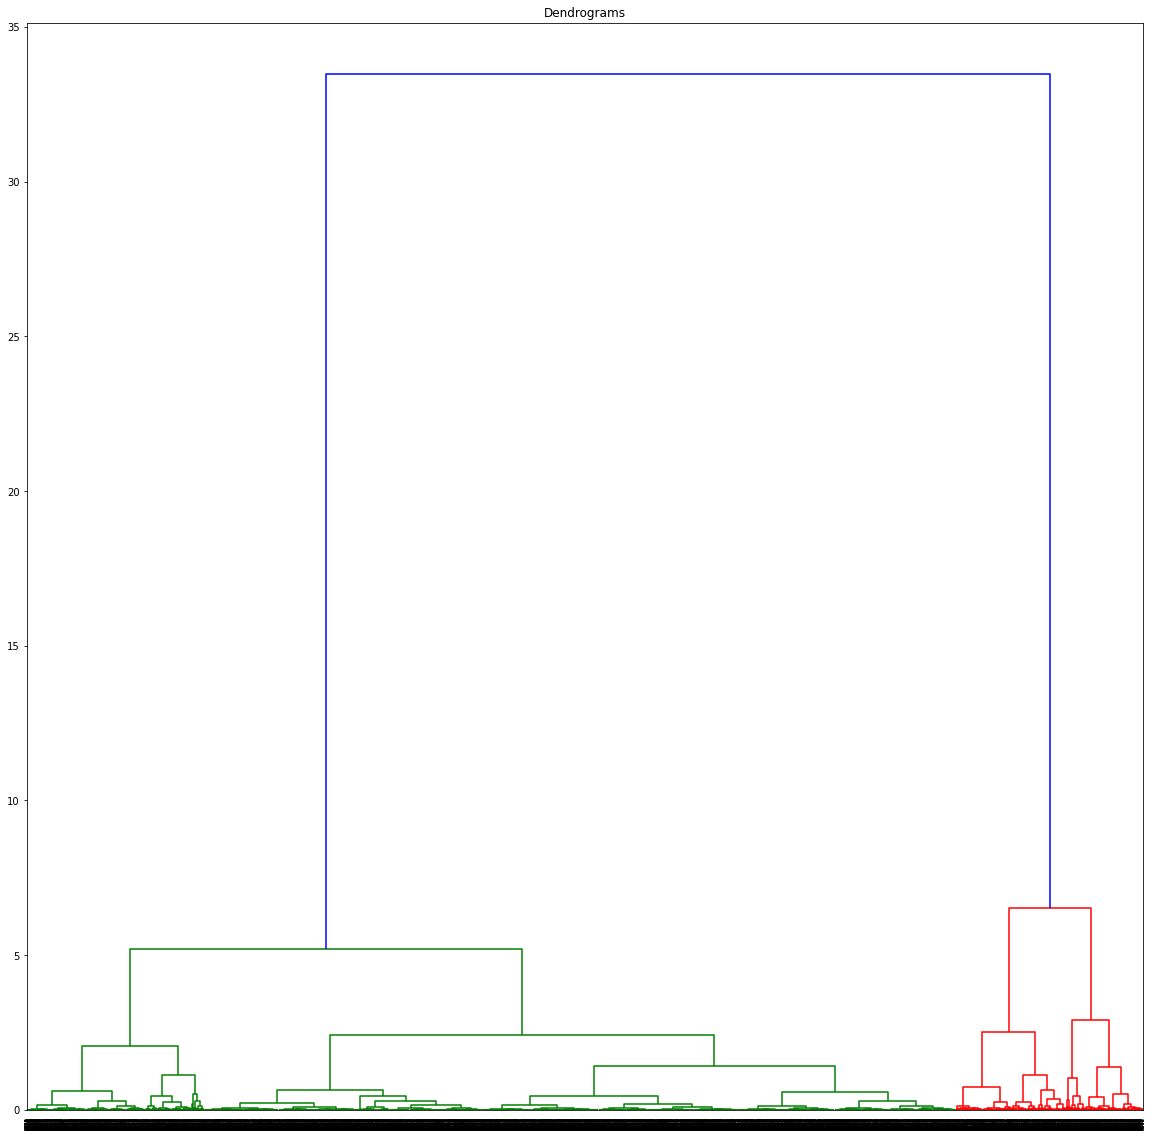

In [55]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(20, 20))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(x3, method='ward'))

# Ward Linkeage

In [56]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')
#dendrogram = sch.dendrogram(hc)
hc.fit_predict(x3)

array([1, 1, 1, ..., 1, 3, 1], dtype=int64)

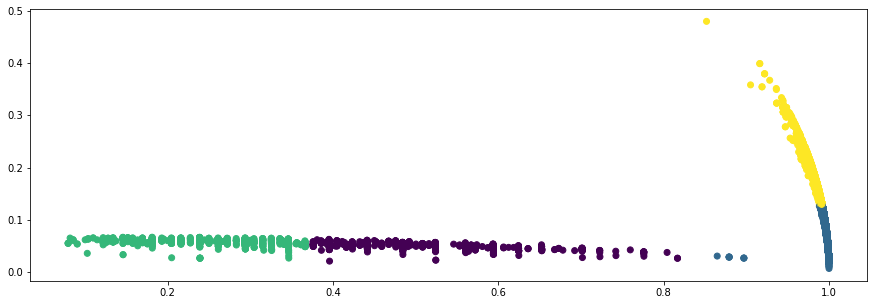

In [57]:
plt.figure(figsize=(15, 5))  
plt.scatter(x3['AMT_INCOME_TOTAL'], x3['DAYS_BIRTH'], c= hc.labels_) 

# Single linkeage

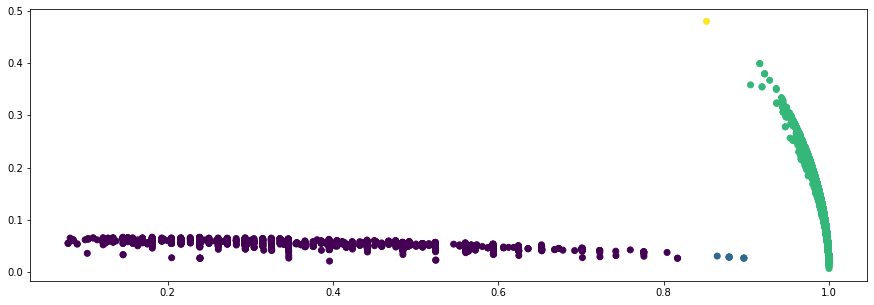

In [58]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'single')
#dendrogram = sch.dendrogram(hc)
hc.fit_predict(x3)

plt.figure(figsize=(15, 5))  
plt.scatter(x3['AMT_INCOME_TOTAL'], x3['DAYS_BIRTH'], c= hc.labels_) 

# Average Linkeage

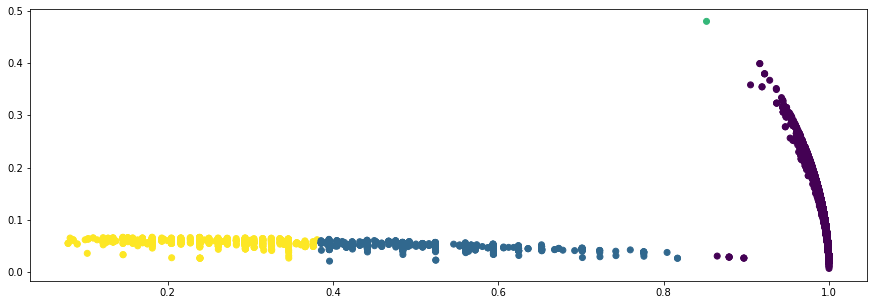

In [59]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'average')
#dendrogram = sch.dendrogram(hc)
hc.fit_predict(x3)

plt.figure(figsize=(15, 5))  
plt.scatter(x3['AMT_INCOME_TOTAL'], x3['DAYS_BIRTH'], c= hc.labels_) 

# Association Rule - 
# 1. Apriori

In [60]:
modified_application

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS,IS_RISKY
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,12005,4542,1,1,0,0,NaN,2.0,15.0,No
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,12005,4542,1,1,0,0,NaN,2.0,14.0,No
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,21474,1134,1,0,0,0,Security staff,2.0,29.0,No
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,1,0,1,1,Sales staff,1.0,4.0,No
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,1,0,1,1,Sales staff,1.0,26.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,17348,2420,1,0,0,0,Managers,2.0,11.0,Yes
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,12387,1325,1,0,1,1,Medicine staff,2.0,23.0,Yes
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,12387,1325,1,0,1,1,Medicine staff,2.0,32.0,Yes
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,17958,655,1,0,0,0,Sales staff,2.0,9.0,Yes


In [61]:
ap_pro = modified_application.iloc[:,[6,7,8,9,16,19]]

In [62]:
ap_pro=ap_pro.dropna()

In [63]:
transactions = []
for i in range(0, len(ap_pro)):
    transactions.append([str(ap_pro.values[i,j]) for j in range(0, 6)])

In [64]:
transactions

[['Working',
  'Secondary / secondary special',
  'Married',
  'House / apartment',
  'Security staff',
  'No'],
 ['Commercial associate',
  'Secondary / secondary special',
  'Single / not married',
  'House / apartment',
  'Sales staff',
  'No'],
 ['Commercial associate',
  'Secondary / secondary special',
  'Single / not married',
  'House / apartment',
  'Sales staff',
  'No'],
 ['Commercial associate',
  'Secondary / secondary special',
  'Single / not married',
  'House / apartment',
  'Sales staff',
  'No'],
 ['Commercial associate',
  'Secondary / secondary special',
  'Single / not married',
  'House / apartment',
  'Sales staff',
  'No'],
 ['Working',
  'Higher education',
  'Married',
  'House / apartment',
  'Accountants',
  'No'],
 ['Working',
  'Higher education',
  'Married',
  'House / apartment',
  'Accountants',
  'No'],
 ['Commercial associate',
  'Secondary / secondary special',
  'Married',
  'House / apartment',
  'Laborers',
  'No'],
 ['Commercial associate',
  '

# Apriori implementation using apyori library

In [65]:
from apyori import apriori
rules = apriori(transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 3)

In [66]:
results = list(rules)

In [67]:
lift = []
association = []
for i in range (0, len(results)):
    lift.append(results[:len(results)][i][2][0][3])
    association.append(list(results[:len(results)][i][0]))

# Visualizing results in a dataframe

In [68]:
rank = pd.DataFrame([association, lift]).transpose()
rank.columns = ['Association', 'Lift']

In [69]:
rank.sort_values('Lift', ascending=False).head(10)

,Association,Lift
16,"[Single / not married, Laborers, Rented apartm...",6.27173
4,"[Single / not married, Laborers, Rented apartm...",6.16662
28,"[Medicine staff, House / apartment, Secondary ...",5.24963
15,"[State servant, Medicine staff, House / apartm...",5.24934
20,"[State servant, Medicine staff, No, Secondary ...",5.12977
7,"[State servant, Medicine staff, Secondary / se...",5.12277
29,"[Secondary / secondary special, No, Single / n...",4.89183
17,"[Single / not married, Laborers, Rented apartm...",4.8458
27,"[Medicine staff, House / apartment, Married, S...",4.56086
33,"[Medicine staff, House / apartment, Married, S...",4.54189


# 2. Eclat

In [70]:
# Putting all transactions in a single list
itens = []
for i in range(0, len(transactions)):
    itens.extend(transactions[i])

# Finding unique items from transactions and removing nan
uniqueItems = list(set(itens))


In [71]:
uniqueItems

['Waiters/barmen staff',
 'HR staff',
 'IT staff',
 'Accountants',
 'Civil marriage',
 'No',
 'High skill tech staff',
 'Rented apartment',
 'Widow',
 'Cleaning staff',
 'Managers',
 'Office apartment',
 'Pensioner',
 'House / apartment',
 'Realty agents',
 'Incomplete higher',
 'Sales staff',
 'Single / not married',
 'Laborers',
 'Medicine staff',
 'Low-skill Laborers',
 'Higher education',
 'Private service staff',
 'Married',
 'Drivers',
 'Lower secondary',
 'Security staff',
 'Yes',
 'Commercial associate',
 'Secretaries',
 'Municipal apartment',
 'Separated',
 'Cooking staff',
 'Secondary / secondary special',
 'With parents',
 'Student',
 'Co-op apartment',
 'Academic degree',
 'Working',
 'State servant',
 'Core staff']

### Creating combinations with the items - pairs

In [72]:
pair = []
for j in range(0, len(uniqueItems)):
    k = 1;
    while k <= len(uniqueItems):
        try:
            pair.append([uniqueItems[j], uniqueItems[j+k]])
        except IndexError:
            pass
        k = k + 1;       

In [73]:
pair

[['Waiters/barmen staff', 'HR staff'],
 ['Waiters/barmen staff', 'IT staff'],
 ['Waiters/barmen staff', 'Accountants'],
 ['Waiters/barmen staff', 'Civil marriage'],
 ['Waiters/barmen staff', 'No'],
 ['Waiters/barmen staff', 'High skill tech staff'],
 ['Waiters/barmen staff', 'Rented apartment'],
 ['Waiters/barmen staff', 'Widow'],
 ['Waiters/barmen staff', 'Cleaning staff'],
 ['Waiters/barmen staff', 'Managers'],
 ['Waiters/barmen staff', 'Office apartment'],
 ['Waiters/barmen staff', 'Pensioner'],
 ['Waiters/barmen staff', 'House / apartment'],
 ['Waiters/barmen staff', 'Realty agents'],
 ['Waiters/barmen staff', 'Incomplete higher'],
 ['Waiters/barmen staff', 'Sales staff'],
 ['Waiters/barmen staff', 'Single / not married'],
 ['Waiters/barmen staff', 'Laborers'],
 ['Waiters/barmen staff', 'Medicine staff'],
 ['Waiters/barmen staff', 'Low-skill Laborers'],
 ['Waiters/barmen staff', 'Higher education'],
 ['Waiters/barmen staff', 'Private service staff'],
 ['Waiters/barmen staff', 'Marr

#### Calculating score
The calculation is done looking at the number of customers that bought both items (the pair) and divided by all customers of the week (25134). This calculation is done for all pairs possible and the score is returned on "score" list.

$ score = \frac{\text{number of lists that contain [item x and item y]}} {\text{number of all lists}} $

In [74]:
%%time
score = []
for i in pair:
    cond = []
    for item in i:
        cond.append('("%s") in s' %item)
    mycode = ('[s for s in transactions if ' + ' and '.join(cond) + ']')
    #mycode = "print 'hello world'"
    score.append(len(eval(mycode))/25134)

Wall time: 3.11 s


#### Showing results

Top 10 Most common pairs of items of this week

In [75]:
ranking_ECLAT = pd.DataFrame([pair, score]).transpose()
ranking_ECLAT.columns = ['Pair', 'Score']

In [76]:
ranking_ECLAT.sort_values('Score', ascending=False).head(10)

,Pair,Score
197,"[No, House / apartment]",0.864884
207,"[No, Married]",0.685605
217,"[No, Secondary / secondary special]",0.658113
451,"[House / apartment, Married]",0.619679
222,"[No, Working]",0.611164
461,"[House / apartment, Secondary / secondary spec...",0.591112
466,"[House / apartment, Working]",0.547466
676,"[Married, Secondary / secondary special]",0.465943
796,"[Secondary / secondary special, Working]",0.443463
681,"[Married, Working]",0.440002


### What if we do that for trios?

In [77]:
# Creating trios
trio = []
for j in range(0, len(uniqueItems)):
    for k in range(j, len(uniqueItems)):
        for l in range(k, len(uniqueItems)):
            if (k != j) and (j != l) and (k != l):
                try:
                    trio.append([uniqueItems[j], uniqueItems[j+k], uniqueItems[j+l]])
                except IndexError:
                    pass 

In [78]:
trio[:5]

[['Waiters/barmen staff', 'HR staff', 'IT staff'],
 ['Waiters/barmen staff', 'HR staff', 'Accountants'],
 ['Waiters/barmen staff', 'HR staff', 'Civil marriage'],
 ['Waiters/barmen staff', 'HR staff', 'No'],
 ['Waiters/barmen staff', 'HR staff', 'High skill tech staff']]

In [79]:
%%time
score_trio = []
for i in trio:
    cond = []
    for item in i:
        cond.append('("%s") in s' %item)
    mycode = ('[s for s in transactions if ' + ' and '.join(cond) + ']')
    #mycode = "print 'hello world'"
    score_trio.append(len(eval(mycode))/7501.)

Wall time: 21.6 s


In [80]:
ranking_ECLAT_trio = pd.DataFrame([trio, score_trio]).transpose()
ranking_ECLAT_trio.columns = ['Trio', 'Score']
ranking_ECLAT_trio.sort_values('Score', ascending=False).head(10)

,Trio,Score
3236,"[No, House / apartment, Married]",2.04319
3246,"[No, House / apartment, Secondary / secondary ...",1.94961
3251,"[No, House / apartment, Working]",1.80496
3461,"[No, Married, Secondary / secondary special]",1.53793
3581,"[No, Secondary / secondary special, Working]",1.46101
3466,"[No, Married, Working]",1.45074
5345,"[House / apartment, Secondary / secondary spec...",1.31836
3234,"[No, House / apartment, Higher education]",0.82389
3241,"[No, House / apartment, Commercial associate]",0.814691
3231,"[No, House / apartment, Laborers]",0.704039
